## Import libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Inspect the data

In [2]:
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
# How many rows and columns do we have
np.shape(df)

(1721, 24)

In [4]:
# Let's inspect the data in more detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

## Let's analyze the relationship between the data

In [5]:
skills = df.columns[2:20].to_list()
print(skills)

outcomes = df.columns[-4:].to_list()
print(outcomes)

['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon', 'SecondServePointsWon', 'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted', 'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved', 'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalPointsWon', 'TotalServicePointsWon']
['Wins', 'Losses', 'Winnings', 'Ranking']


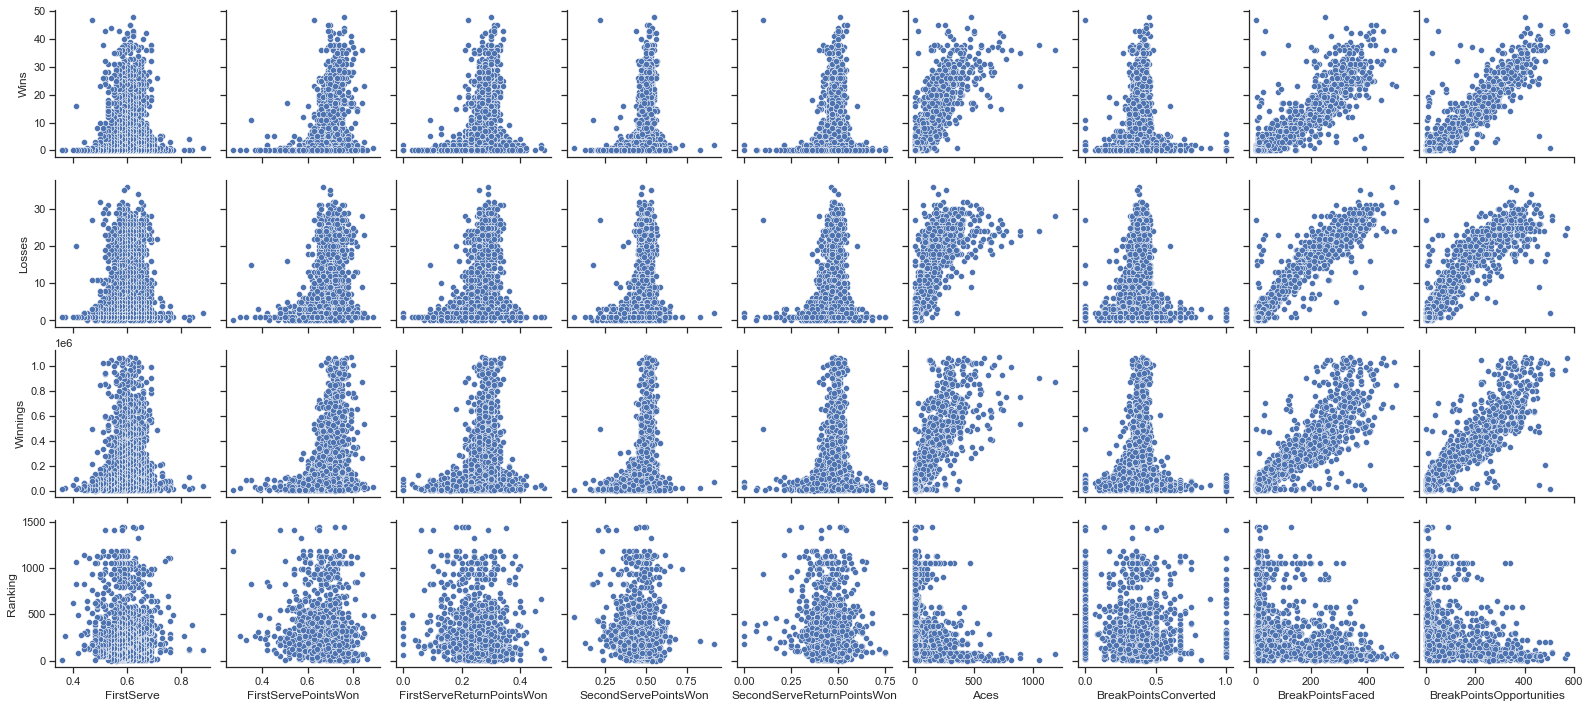

In [6]:
sns.set_theme(style="ticks")

sns.pairplot(df, x_vars=skills[:9], y_vars=outcomes)

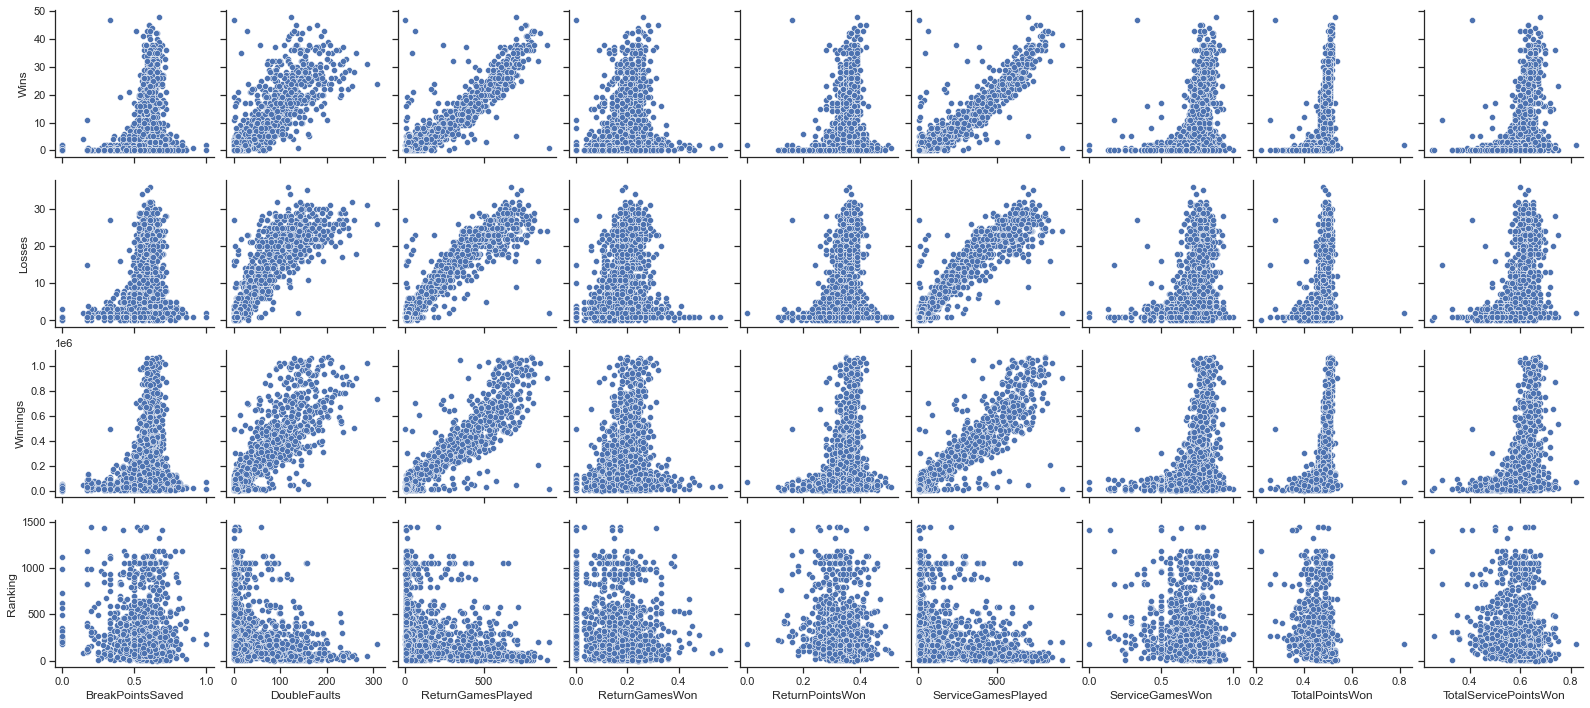

In [7]:
sns.set_theme(style="ticks")

sns.pairplot(df, x_vars=skills[9:], y_vars=outcomes)

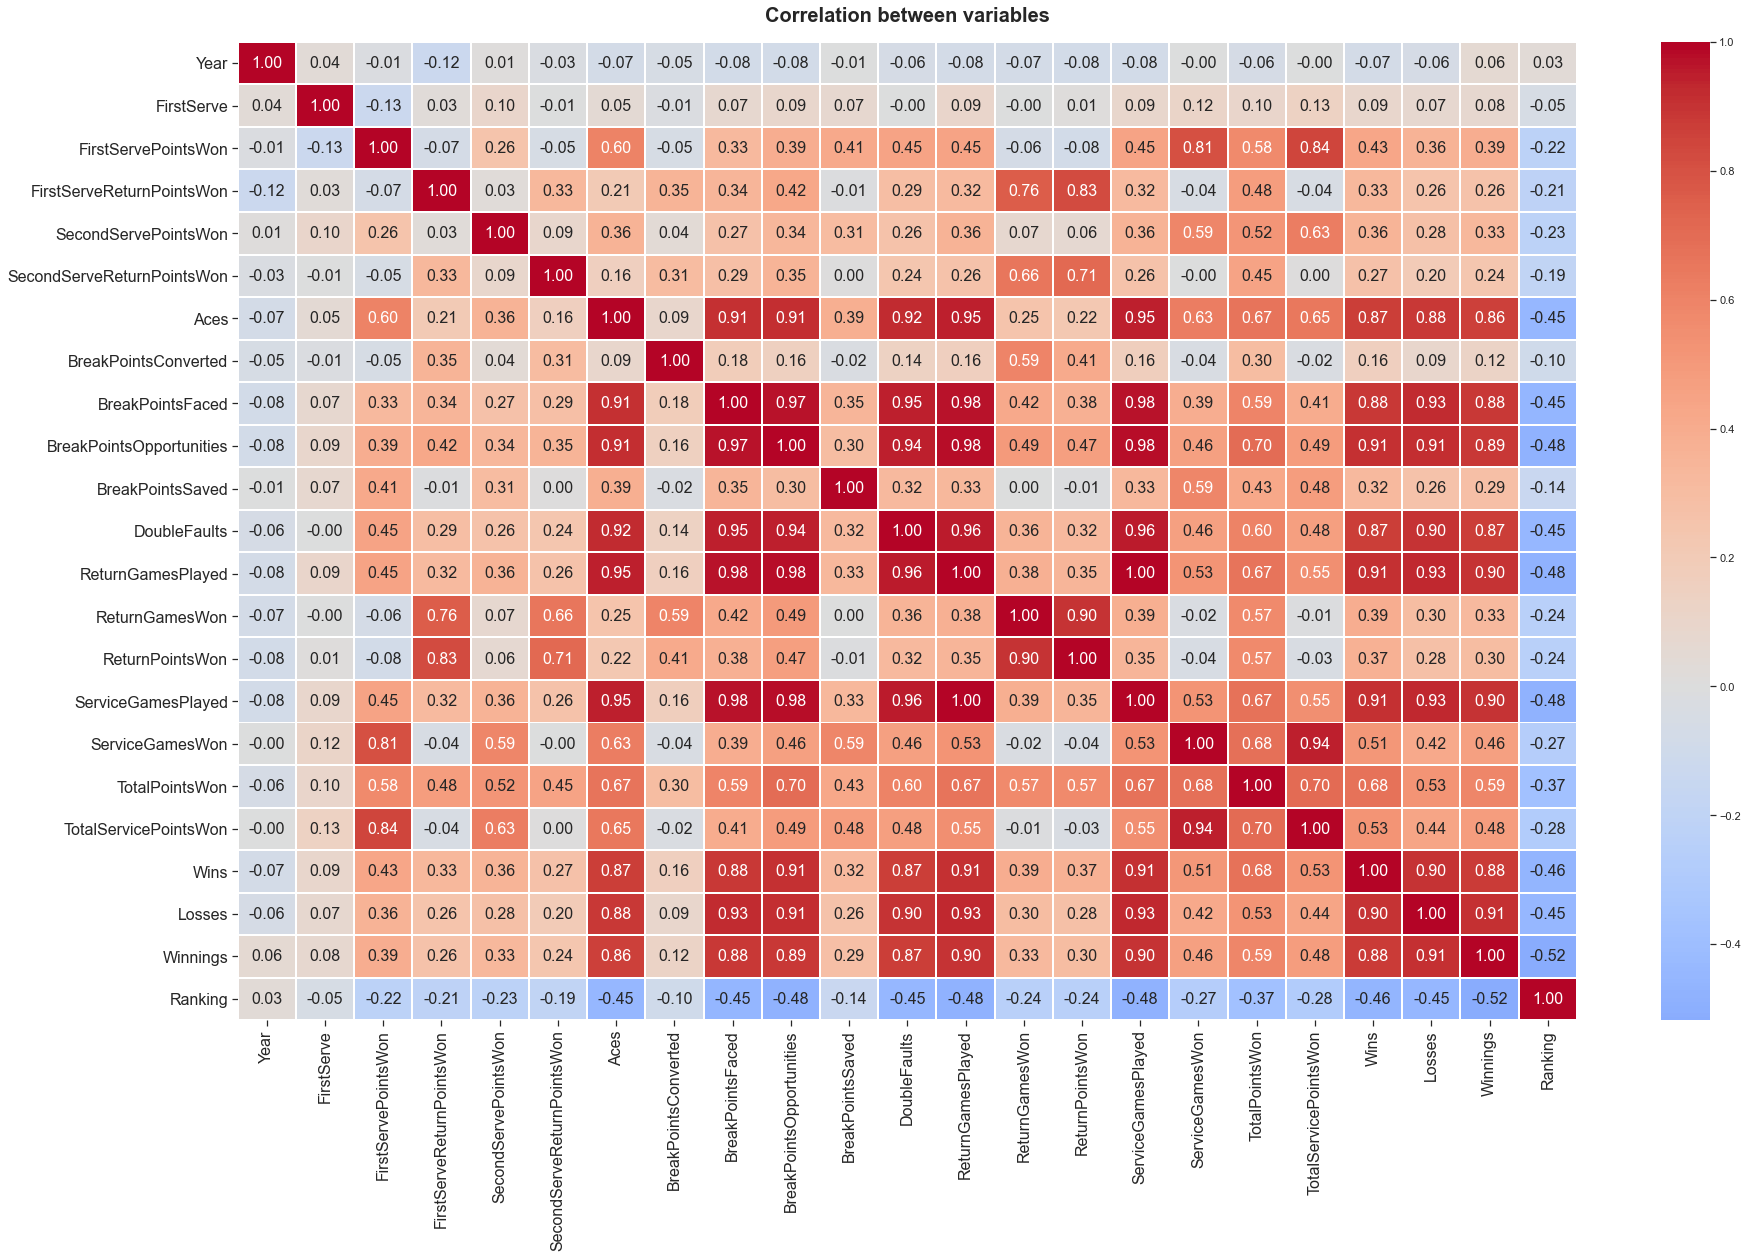

In [8]:
df_corr = df.corr(method='spearman')
# Create a heat map
plt.figure(figsize=(30,18))

#sns.set(font_scale=1.4)
sns.heatmap(df_corr,
           xticklabels= df_corr.columns,
           yticklabels= df_corr.columns,
           annot=True,
           annot_kws= {'size': 16}, 
           cmap= 'coolwarm',
           linewidths=1,
           center=0,
           fmt='.2f')
    
plt.title('Correlation between variables', fontsize='20', fontweight='bold', pad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Let's order the values of the correlation based on their strength. 
Also, let's consider only the correlations where their significance is <0.05, because it means that the correlation is not due to chance.

In [9]:
corr = pg.pairwise_corr(df, method='spearman')

b = corr.sort_values(by=['r'], ascending=False)[['X', 'Y', 'n', 'r', 'p-unc']]

In [10]:
only_winnings = b[(b['Y'] == 'Winnings') & (b['p-unc'] < 0.05)]
only_winnings.reset_index(drop=True)[0:5]

,X,Y,n,r,p-unc
0,Losses,Winnings,1721,0.907648,0.0
1,ReturnGamesPlayed,Winnings,1721,0.900977,0.0
2,ServiceGamesPlayed,Winnings,1721,0.900579,0.0
3,BreakPointsOpportunities,Winnings,1721,0.886841,0.0
4,BreakPointsFaced,Winnings,1721,0.884782,0.0


In [11]:
only_wins = b[(b['Y'] == 'Wins') & (b['p-unc'] < 0.05)]
only_wins.reset_index(drop=True)[0:5]

,X,Y,n,r,p-unc
0,BreakPointsOpportunities,Wins,1721,0.906281,0.0
1,ServiceGamesPlayed,Wins,1721,0.905465,0.0
2,ReturnGamesPlayed,Wins,1721,0.905322,0.0
3,BreakPointsFaced,Wins,1721,0.883187,0.0
4,Aces,Wins,1721,0.872635,0.0


In [12]:
only_losses = b[(b['Y'] == 'Losses') & (b['p-unc'] < 0.05)]
only_losses.reset_index(drop=True)[0:5]

,X,Y,n,r,p-unc
0,ReturnGamesPlayed,Losses,1721,0.929452,0.0
1,ServiceGamesPlayed,Losses,1721,0.928912,0.0
2,BreakPointsFaced,Losses,1721,0.926026,0.0
3,BreakPointsOpportunities,Losses,1721,0.912262,0.0
4,Wins,Losses,1721,0.904771,0.0


In [13]:
only_ranking = b[(b['Y'] == 'Ranking') & (b['p-unc'] < 0.05)]
only_ranking.reset_index(drop=True).sort_values(by=['r'], ascending=True)[0:5]

,X,Y,n,r,p-unc
20,Winnings,Ranking,1721,-0.518254,6.560009e-119
19,BreakPointsOpportunities,Ranking,1721,-0.480228,5.500842e-100
18,ServiceGamesPlayed,Ranking,1721,-0.477484,1.037595e-98
17,ReturnGamesPlayed,Ranking,1721,-0.477344,1.204508e-98
16,Wins,Ranking,1721,-0.463439,2.315071e-92


## Resume

### After analyzing the data, we can conclude the following:

1. Data pre-processing: There are 1721 data points in 24 columns. There are no null values, so we can continue with the next steps.

2. Data type: in general we can divide this data frame into three sections. The first is who and when ?, which in this case would be the player and year columns. The second is the skills of the player. The third are the outcomes of those skills, which in this case would be:

* Victories: number of games won in a year.
* Losses: number of games lost in a year.
* Earnings: total earnings in USD in one year.
* Ranking: ranking at the end of the year.

The outcomes will be our dependent variables and skills will be the independent variables.

3. Relationship between the dependent and independent variables: for this we use three methods:

* Pair diagram function: First, we plot the relationship between the variables on a scatter plot.

* Heat map: to see if there is a strong or weak relationship between the dependent and independent variables, we draw a heat map.

The Correlation Coefficient and the Importance of the Correlation Coefficient: While the heat map is a great option to see the correlation, we may want to investigate further whether it is due to chance or not. To do this, we can use the "corr" function and analyze each of these in more detail. To confirm the significance, we can filter if the p-value is less than 0.05.

### Conclution:

The variables that present a strong correlation with the outcomes are:

* ServiceGamesPlayed: total number of games that the player served.
* Aces: number of player serves in which the receiver does not touch the ball.
* BreakPointsFaced: number of times the receiver could have won the player's service game.
* BreakPointsSaved:% of the times the player was able to prevent the receiver from winning the service game when he had the opportunity.
* ReturnGamesPlayed - Total number of games served by the player's opponent.
* TotalServicePointsWon:% of game points the player served and won.

In the case of Ranking, we can see from the scatter diagrams that there is no strong linear relationship with the independent values, so it may be a difficult variable to predict.

## Create a linear regresion model with "Wins" & "BreakPointsOpportunities"

### Define the x and y variables

In [14]:
x = df['BreakPointsOpportunities'].values.reshape(-1,1)
print(x)

y = df['Wins'].values
print(y)

[[7]
 [0]
 [8]
 ...
 [4]
 [5]
 [9]]
[1 0 4 ... 0 0 0]


### Split the dataset in training & test set

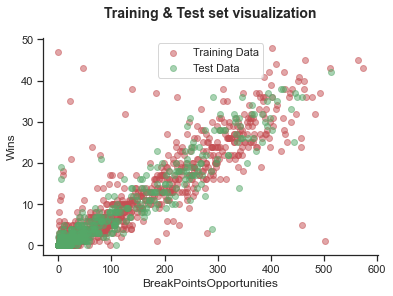

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3)

# Test train split visualization
plt.scatter(x_train, y_train, label='Training Data', c='r', alpha=0.5)
plt.scatter(x_test, y_test, label='Test Data', c='g', alpha=0.5)

plt.title('Training & Test set visualization', fontsize='14', fontweight='bold', pad=20)
plt.ylabel('Wins')
plt.xlabel('BreakPointsOpportunities')
sns.despine()
plt.legend()
plt.show()

### Train the model on the training set & predict values

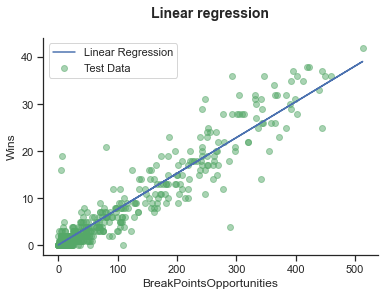

In [16]:
# build regression model
mlr = LinearRegression()
mlr.fit(x_train, y_train)

# Use the model to predict on Test Data
y_predict = mlr.predict(x_test)

# Plot the results
plt.title('Linear regression', fontsize='14', fontweight='bold', pad=20)
plt.plot(x_test, y_predict, label='Linear Regression', color= 'b')
plt.scatter(x_test, y_test, label='Test Data', c='g', alpha=0.5)
plt.ylabel('Wins')
plt.xlabel('BreakPointsOpportunities')
sns.despine()
plt.legend()
plt.show()

### Evaluate the model 

In [17]:
r2 = r2_score(y_test, y_predict)
print(r2)

print(mlr.score(x_test, y_test))

0.898918439857475
0.898918439857475


### Predict Values

In [18]:
# Who much can we wins if we have 147 BreakPointsOpportunities?
mlr.predict([[147]])

array([11.26538738])

### Plot the results

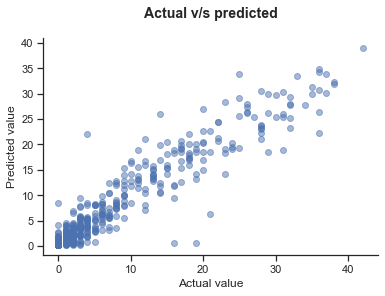

In [19]:
plt.scatter(y_test, y_predict, alpha=.5)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual v/s predicted', fontsize='14', fontweight='bold', pad=20)
sns.despine()
plt.show()

In [20]:
predict_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_predict, 'Difference': y_test - y_predict})
predict_df[:11]

,Actual Value,Predicted Value,Difference
0,24,19.091419,4.908581
1,0,0.704044,-0.704044
2,18,17.419839,0.580161
3,0,0.096197,-0.096197
4,5,8.226152,-3.226152
5,9,13.924718,-4.924718
6,0,0.476101,-0.476101
7,2,1.691796,0.308204
8,1,4.199165,-3.199165
9,37,33.907692,3.092308


## Create a Multilinear regresion model

### Define the x and y variables

In [21]:
x = df[['BreakPointsOpportunities', 'ServiceGamesPlayed', 'ReturnGamesPlayed', 'BreakPointsFaced', 'Aces']].values
print(x)

y = df['Wins'].values
print(y)

[[ 7  8  9  7  0]
 [ 0  9  9  7  7]
 [ 8 17 19 10  2]
 ...
 [ 4 14 14 13  4]
 [ 5  6  7  5  1]
 [ 9  8  9  8  1]]
[1 0 4 ... 0 0 0]


### Split the dataset in training & test set

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1204, 5)
(1204,)
(517, 5)
(517,)


### Train the model on the training set & predict values

In [23]:
# build regression model
mlr = LinearRegression()
mlr.fit(x_train, y_train)

# Use the model to predict on Test Data
y_predict = mlr.predict(x_test)
#print(y_predict)

### Evaluate the model 

In [24]:
r2 = r2_score(y_test, y_predict)
print(r2)

0.8512780375731912


### Predict Values

In [25]:
pd.set_option("display.max_columns", None)
df[df['Player'] == 'Alexander Zverev'].reset_index(drop=True)[0:1]

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Alexander Zverev,2015,0.61,0.72,0.24,0.47,0.48,203,0.44,215,174,0.59,138,412,0.18,0.34,412,0.79,0.49,0.62,14,17,355608,4


In [26]:
mlr.predict([[174, 412, 412, 215, 203]])

array([14.21454373])

### Plot the results

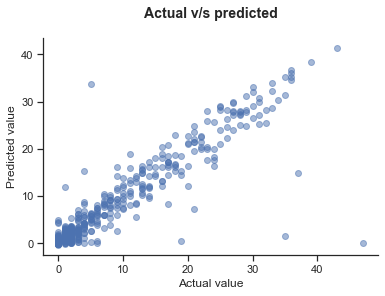

In [27]:
plt.scatter(y_test, y_predict, alpha=.5)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual v/s predicted', fontsize='14', fontweight='bold', pad=20)
sns.despine()
plt.show()

In [28]:
predict_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_predict, 'Difference': y_test - y_predict})
predict_df[:11]

,Actual Value,Predicted Value,Difference
0,3,3.193531,-0.193531
1,0,0.388433,-0.388433
2,0,0.417622,-0.417622
3,7,7.700943,-0.700943
4,1,2.473840,-1.473840
5,10,8.516364,1.483636
6,3,0.684671,2.315329
7,1,0.757051,0.242949
8,3,6.283615,-3.283615
9,1,2.972853,-1.972853
